In [1]:
#Model parameteres
dataFolder = 'data/mix'
batchsize = 50
SUMMARIES_DIR = 'summaries/mix'
learning_rate = 1e-4
outModelFolder = 'savedModels/mix'
alternativeArc = True
epochs = 1
summary = False

testSplit = 0.3 #The number of trainVal points  is (1-testSplit) * Totalpoints
valSplit = 0.3 #The number of train points is (1-valSplit) * nTrainValPoints

#test parameteres DONT USE THIS WITH LARGER MODELS (it will run nexp times the
#selected model train) (if large model use nexp = 1)
nexp = 10
timeNow = "Noinfo"

In [2]:
import sklearn as sk
from sklearn.metrics import accuracy_score
import pylab as plt
import numpy as np
import itertools
from dataUtils import processPca, simplemethodsresults,\
    showRandomImages, showMeanstd, showDataplots, flatInput

from dataset import Dataset, DatasetMat

isMatData = False
if alternativeArc > 2:
    print "Using FLAT datasets"
    isMatData = True

In [ ]:
if alternativeArc == 0:
    from models.cnnWang2016 import runSession
elif alternativeArc ==1 :
    from models.altArchitecture import runSession
elif alternativeArc ==2 :
    from models.alt2 import runSession
elif alternativeArc == 3:
    from models.cnnWang2016FLAT import runSession
elif alternativeArc ==4 :
    from models.altArchitectureFLAT import runSession
elif alternativeArc ==5: 
    from models.alt2FLAT import runSession

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
# Note the number of classes will be automatically detected from the dataset (it will check the set of image names
# name_0, name_1 ,name_2 etc )

accs = []
confms = []
trainTime = 0
for i in range(nexp):
    logs,ypred,ytrue, datasetSeed,runTime, trainLoss, valLoss, valAc = runSession(dataFolder,testSplit,valSplit,
                                  batchsize, 
                                  SUMMARIES_DIR,
                                  learning_rate, 
                                  outModelFolder,
                                  summary,
                                  epochs=epochs)
    acc = accuracy_score(ytrue, ypred)
    cnf_matrix = sk.metrics.confusion_matrix(ytrue, ypred)
    cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    
    accs.append(acc)
    confms.append(cnf_matrix)
    
    trainTime += runTime
meanTrainTime = trainTime*1.0 / nexp

lastSeedUsed = datasetSeed

lastTrainLoss = trainLoss
lastValLoss = valLoss
lastValAc = valAc

Epoch 0, training loss 0.622187, accuracy 0.640000


Validation accuracy 0.710526
Time elapsed 0.1281132857 minutes


Epoch 1, training loss 0.435625, accuracy 0.960000


Validation accuracy 1.000000
Time elapsed 0.253173951308 minutes
Validation accuracy 1.0 ?!


Epoch 2, training loss 0.233597, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.41272961696 minutes
Validation accuracy 1.0 ?!


Epoch 3, training loss 0.110344, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.59502928257 minutes
Validation accuracy 1.0 ?!


Epoch 4, training loss 0.052591, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.776648016771 minutes
Validation accuracy 1.0 ?!


Epoch 5, training loss 0.025779, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.958501283328 minutes
Validation accuracy 1.0 ?!


Epoch 6, training loss 0.011715, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.1404022495 minutes
Validation accuracy 1.0 ?!


Epoch 7, training loss 0.005277, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.32246723572 minutes
Validation accuracy 1.0 ?!


Epoch 8, training loss 0.002486, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.50597741604 minutes
Validation accuracy 1.0 ?!


Epoch 9, training loss 0.001255, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.68909680049 minutes
Validation accuracy 1.0 ?!


Testing set accuracy 1.000000


Epoch 0, training loss 0.454339, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.191614552339 minutes
Validation accuracy 1.0 ?!


Epoch 1, training loss 0.297247, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.412944451968 minutes
Validation accuracy 1.0 ?!


Epoch 2, training loss 0.173973, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.633655516307 minutes
Validation accuracy 1.0 ?!


Epoch 3, training loss 0.098504, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 0.878454983234 minutes
Validation accuracy 1.0 ?!


Epoch 4, training loss 0.052210, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.102300934 minutes
Validation accuracy 1.0 ?!


Epoch 5, training loss 0.026253, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.30862606764 minutes
Validation accuracy 1.0 ?!


Epoch 6, training loss 0.013609, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.55725028515 minutes
Validation accuracy 1.0 ?!


Epoch 7, training loss 0.007256, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.79240063429 minutes
Validation accuracy 1.0 ?!


Epoch 8, training loss 0.003968, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 1.98017171621 minutes
Validation accuracy 1.0 ?!


Epoch 9, training loss 0.002185, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 2.19269723495 minutes
Validation accuracy 1.0 ?!


Testing set accuracy 1.000000


Epoch 0, training loss 0.668473, accuracy 0.660000


Validation accuracy 0.684211
Time elapsed 0.174738117059 minutes


Epoch 1, training loss 0.532814, accuracy 0.660000


Validation accuracy 0.684211
Time elapsed 0.396647000313 minutes


Epoch 2, training loss 0.451124, accuracy 1.000000


Validation accuracy 0.973684
Time elapsed 0.624826216698 minutes


Epoch 3, training loss 0.370354, accuracy 1.000000


Validation accuracy 0.973684
Time elapsed 0.859910015265 minutes


Epoch 4, training loss 0.321757, accuracy 0.880000


Validation accuracy 0.921053
Time elapsed 1.10452346802 minutes


Epoch 5, training loss 0.299693, accuracy 0.860000


Validation accuracy 0.894737
Time elapsed 1.33371421496 minutes


Epoch 6, training loss 0.264990, accuracy 1.000000


Validation accuracy 0.973684
Time elapsed 1.54508178234 minutes


Epoch 7, training loss 0.257301, accuracy 1.000000


Validation accuracy 0.973684
Time elapsed 1.78603034814 minutes


Epoch 8, training loss 0.250890, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 2.02552881638 minutes
Validation accuracy 1.0 ?!


Epoch 9, training loss 0.246092, accuracy 1.000000


Validation accuracy 1.000000
Time elapsed 2.23328808149 minutes
Validation accuracy 1.0 ?!


Testing set accuracy 0.980000


Showing last log output
--------------------------------
--------------------------------
Using datafolder  data/mix
Using testSplit  0.3
Using valSplit  0.3
Using batchsize  50
Using SUMMARIES_DIR  summaries/mix
Using learning_rate  0.0001
Using outModelFolder  savedModels/mix
Using dataset seed  19.7292593212
Class distribution  Train set Counter({1: 62, 0: 26}) test set Counter({1: 33, 0: 22})
Epochs to train  10
Epoch , training loss , accuracy (0, 0.66847348, 0.66000003)
Validation accuracy 0.684211
Epoch , training loss , accuracy (1, 0.53281397, 0.66000003)
Validation accuracy 0.684211
Epoch , training loss , accuracy (2, 0.45112389, 1.0)
Validation accuracy 0.973684
Epoch , training loss , accuracy (3, 0.37035373, 1.0)
Validation accuracy 0.973684
Epoch , training loss , accuracy (4, 0.32175696, 0.88)
Validation accuracy 0.921053
Epoch , training loss , accuracy (5, 0.29969263, 0.86000001)
Validation accuracy 0.894737
Epoch , training loss , accuracy (6, 0.2649903, 1.0)
Validat

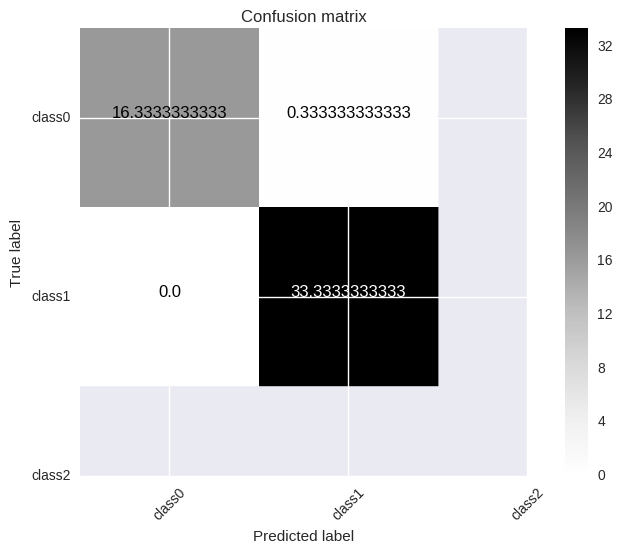

Confusion matrix, without normalization
[[ 3.77123617  0.47140452]
 [ 0.          4.02768199]]


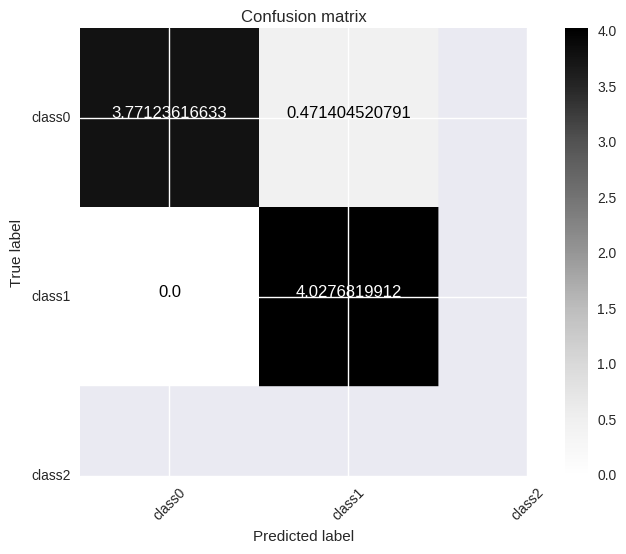

In [10]:
print "Showing last log output"
print "--------------------------------"
print "--------------------------------"
print "\n".join(logs)
print "--------------------------------"
print "--------------------------------"

accMean = np.mean(np.array(accs))
accStd = np.std(np.array(accs))
print "Mean accuracy and std "
print "acc mean: ",accMean," acc std : ",accStd

print "Plotting mean and std Confusion matrixs"
allConfm = np.array(confms)
meancnfm = np.mean(allConfm,axis=0)
stdcnfm = np.std(allConfm,axis=0)

print(meancnfm)
print(stdcnfm)
#plot_confusion_matrix(meancnfm, ["class0","class1","class2",'class3'])
#plot_confusion_matrix(stdcnfm, ["class0","class1","class2",'class3'])

In [36]:
# #Comparation
# SVD, MLP with and wout PCA
%matplotlib inline

In [19]:
print "Results for raw data in models"
#Limited to 500 points because of high dims
transform = lambda x,y,z,w : (x,y,z,w)
resultsRaw = simplemethodsresults(dataFolder,transform,limitPoints=500,isMat=isMatData)

Results for raw data in models


Results: 
MLP accuracy mean  1.0  std  0.0
Linear SVM accuracy mean  1.0  std  0.0
SVM accuracy mean  1.0  std  0.0


In [18]:
print "Results for cluster in models"
resultsPCA = simplemethodsresults(dataFolder,processPca,limitPoints=None,isMat=isMatData)

Results for cluster in models


Results: 
MLP accuracy mean  1.0  std  0.0
Linear SVM accuracy mean  1.0  std  0.0
SVM accuracy mean  0.642424242424  std  0.0521353046487


In [ ]:
# #Visualizacion
# Datos mean images per class

In [20]:
#Use the last trained dataset
if isMatData:
    dataset  = Dataset(dataFolder,batch_size=batchsize,seed=int(lastSeedUsed))
else:
    dataset = DatasetMat(dataFolder,batch_size=batchsize,seed=int(lastSeedUsed))

Class  0


Class  1


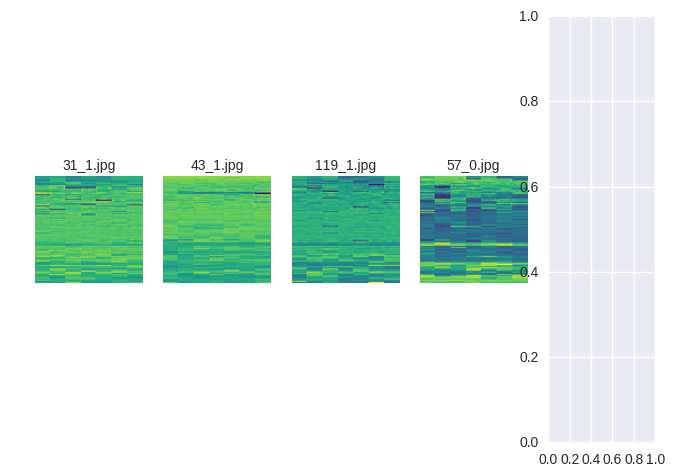

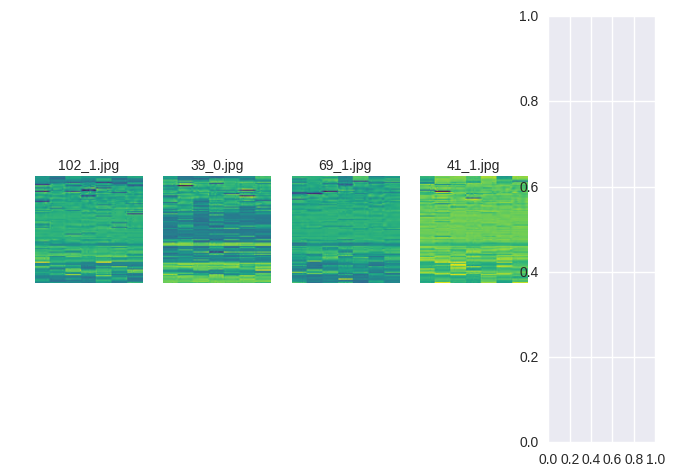

In [24]:
#showRandomImages(dataset,toShow=4)

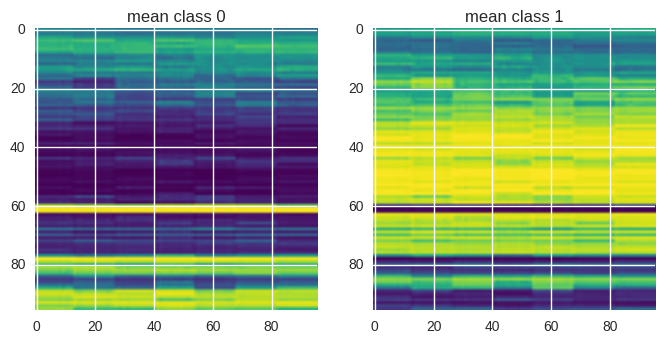

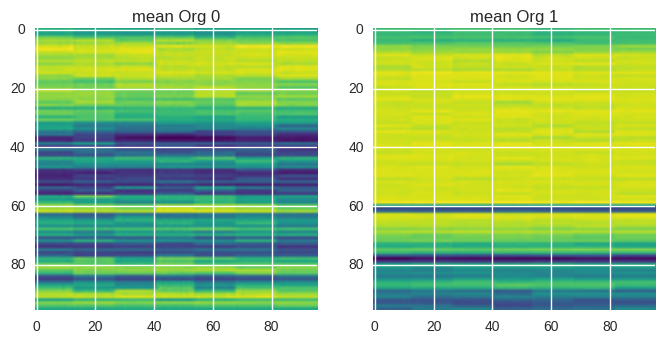

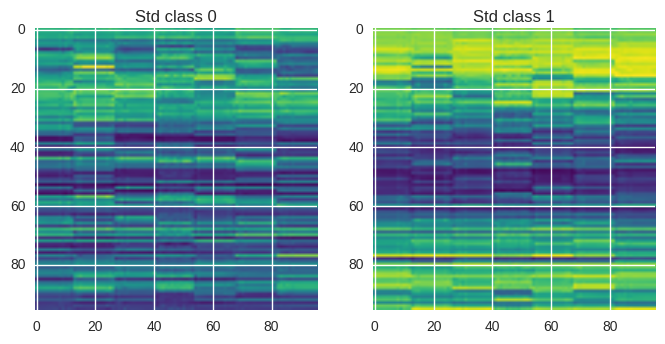

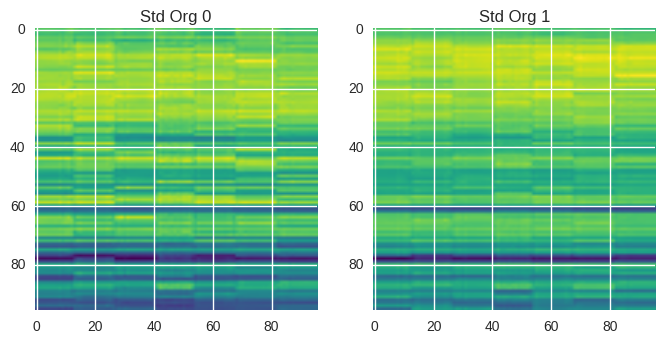

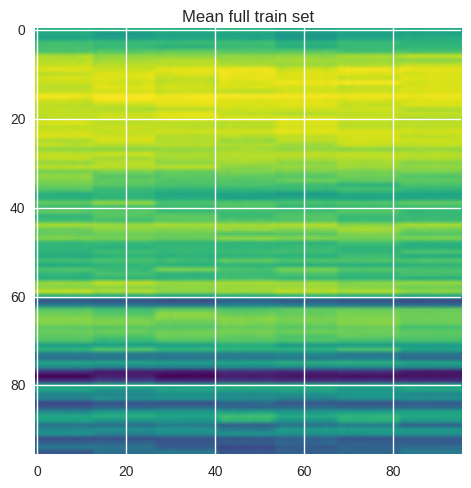

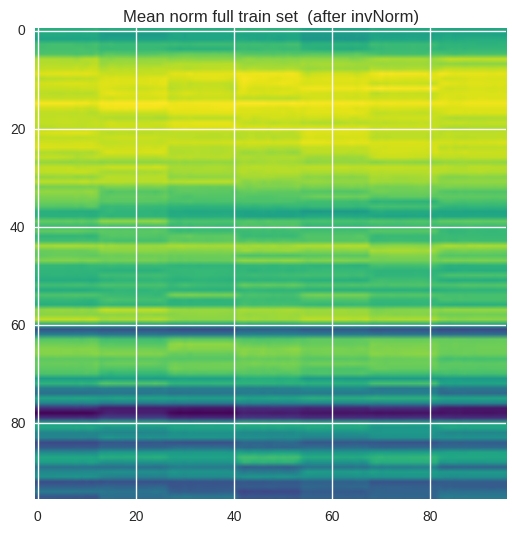

In [31]:
showMeanstd(dataset)

Using matplotlib backend: Qt4Agg


NameError: name 'true' is not defined

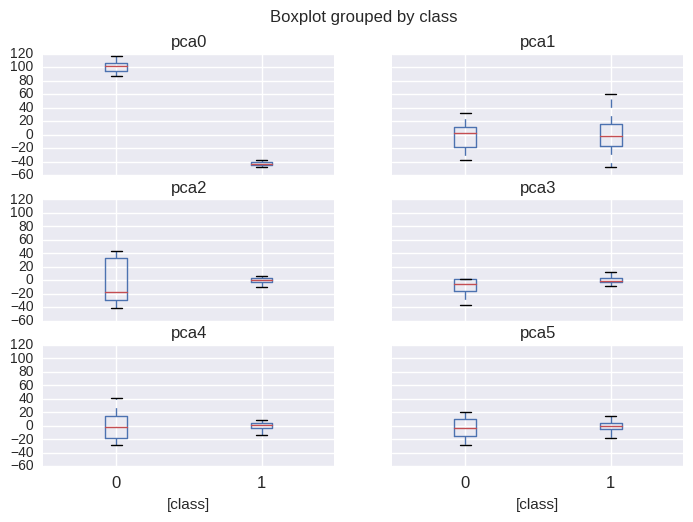

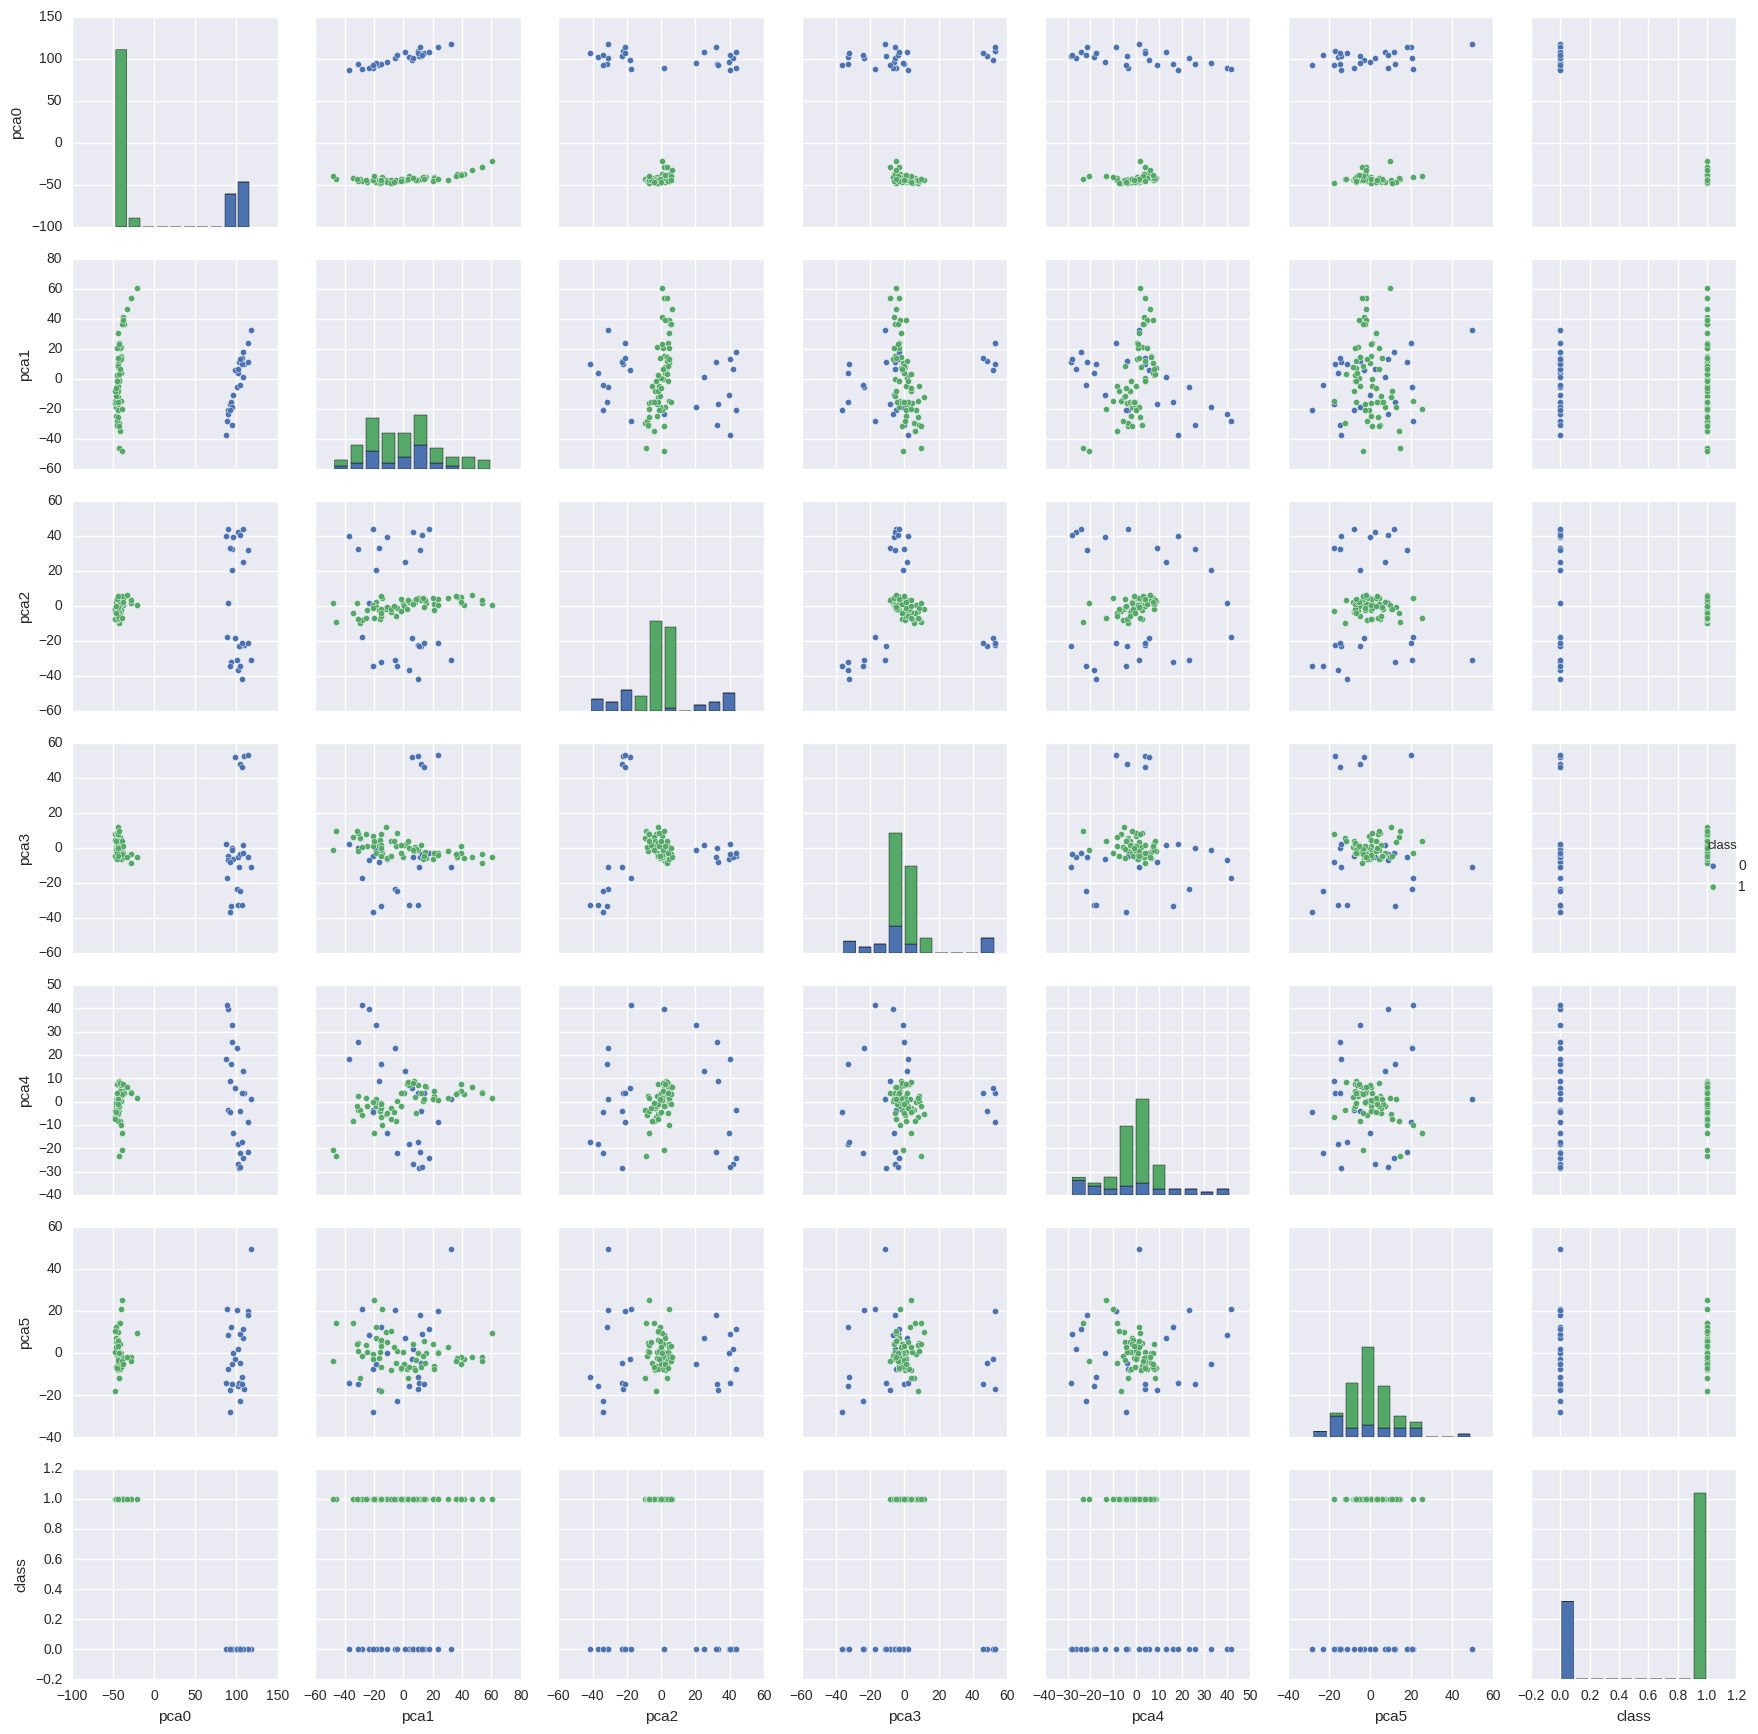

In [35]:
#Show PCA 5 of 
import seaborn as sns
flattenDataset, flatTest, fTrainLabels, fTestLabels = flatInput(dataset.train_data, dataset.train_labels, dataset.test_data, dataset.test_labels)
dx,dtestx,ltrain,ltest = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels)
showDataplots(dx,ltrain)

In [ ]:
#Save report results to pandas dataframe to future eval
import os
import pickle

outFolder = 'pickledReports'
if not os.path.exists(outFolder):
    os.makedirs(outFolder)
name = str(dataFolder.split('/')[-1])+"_"+str(alternativeArc)+"_"+str(timeNow)


out = [name,accMean,accStd,meancnfm,stdcnfm,meanTrainTime,resultsRaw,resultsPCA]

with open(os.path.join(outFolder,name+'.pkl'),'wb+') as f:
    pickle.dump(out,f,-1)

In [ ]:
plt.title('Loss/accuracy vs epoch')
plt.xlabel('epoch')
print lastTrainLoss
print lastValLoss
print lastValAc
plt.plot(lastTrainLoss,'r')
plt.plot(lastValLoss,'y')
plt.figure()
plt.plot(lastValAc,'b*')